In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_keys = "32df13d8bbd8d55bfc220a0ecc23c6f8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=32df13d8bbd8d55bfc220a0ecc23c6f8&units=metric&q=


In [4]:
lat = []
temp = []
humidity = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
counter = 1

print("Beginning Data Retrieval")   
print("--------------------------------")  

for city in cities:
    
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing Record {counter} | {city}") 
        counter+=1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | tuktoyaktuk
Processing Record 2 | smidovich
Processing Record 3 | kodiak
Processing Record 4 | bethel
Processing Record 5 | saint george
Processing Record 6 | geraldton
Processing Record 7 | rikitea
Processing Record 8 | mmabatho
Processing Record 9 | ushuaia
Processing Record 10 | punta arenas
Processing Record 11 | kataysk
Processing Record 12 | abnub
Processing Record 13 | morro bay
Processing Record 14 | bogale
Processing Record 15 | lompoc
City not found. Skipping...
Processing Record 16 | hobart
Processing Record 17 | tanete
Processing Record 18 | georgetown
Processing Record 19 | tual
Processing Record 20 | husavik
City not found. Skipping...
City not found. Skipping...
Processing Record 21 | poum
Processing Record 22 | narsaq
Processing Record 23 | barrow
Processing Record 24 | jamestown
Processing Record 25 | pangnirtung
Processing Record 26 | lagoa
Processing Record 27 | phalia
Processing Record 2

Processing Record 229 | huangmei
Processing Record 230 | mocuba
Processing Record 231 | nelson bay
Processing Record 232 | pontian kecil
Processing Record 233 | ghatanji
Processing Record 234 | ruidoso
Processing Record 235 | marrakesh
Processing Record 236 | hobyo
Processing Record 237 | barra do garcas
Processing Record 238 | abha
Processing Record 239 | felanitx
Processing Record 240 | inhambane
Processing Record 241 | aswan
Processing Record 242 | kerema
Processing Record 243 | alice springs
City not found. Skipping...
Processing Record 244 | guane
Processing Record 245 | amapa
Processing Record 246 | avera
Processing Record 247 | kitimat
Processing Record 248 | omsukchan
City not found. Skipping...
Processing Record 249 | saint-augustin
Processing Record 250 | nadym
Processing Record 251 | hirara
City not found. Skipping...
Processing Record 252 | hokitika
Processing Record 253 | marienburg
Processing Record 254 | harper
Processing Record 255 | bilibino
Processing Record 256 | yar

Processing Record 456 | iguape
Processing Record 457 | okato
Processing Record 458 | biak
Processing Record 459 | vallenar
Processing Record 460 | lengshuijiang
Processing Record 461 | tiarei
Processing Record 462 | guerrero negro
Processing Record 463 | lewiston
Processing Record 464 | aksarayskiy
Processing Record 465 | sibu
Processing Record 466 | kargasok
Processing Record 467 | conceicao do araguaia
City not found. Skipping...
Processing Record 468 | san nicolas
Processing Record 469 | atocha
Processing Record 470 | verkhoyansk
Processing Record 471 | sao jose da coroa grande
Processing Record 472 | rio gallegos
Processing Record 473 | hopatcong
Processing Record 474 | axim
City not found. Skipping...
Processing Record 475 | langen
Processing Record 476 | limoux
Processing Record 477 | pinar del rio
Processing Record 478 | darnah
Processing Record 479 | alassio
Processing Record 480 | dwarka
Processing Record 481 | moradabad
Processing Record 482 | camacha
City not found. Skipping

In [5]:
print(len(lat))
print(len(cloud))
print(len(temp))
print(len(humidity))

572
572
572
572


In [6]:
df = pd.DataFrame(list(zip(cities, lat, temp, humidity, cloud, wind)), 
               columns =['City', 'Latitude', 'Temperature', 'Humidity', 'Cloud', 'Wind']) 

In [7]:
df.head()

,City,Latitude,Temperature,Humidity,Cloud,Wind
0,tuktoyaktuk,69.44,6.00,87,90,3.60
1,smidovich,48.60,14.63,88,100,4.29
2,kodiak,39.95,24.70,61,1,4.10
3,bethel,60.79,17.32,55,40,4.60
4,saint george,39.45,23.68,60,0,0.29


In [15]:
export_csv = df.to_csv("weather.csv"), r'C:/Desktop/Ahmad_DataBootCampHW/Homework 6/'
html = df.to_html('filename.html')

In [9]:
latitude = df.iloc[:,1]
city = df.iloc[:,0]
temperature = df.iloc[:,2]
humid = df.iloc[:,3]
cloudiness = df.iloc[:,4]
windiness = df.iloc[:,5]

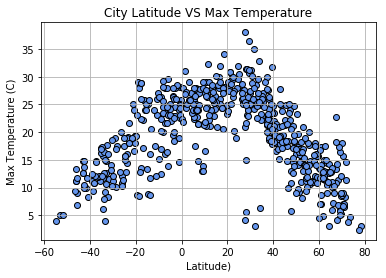

In [10]:
latitude_temp = plt.scatter(latitude, temperature, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Max Temperature")
plt.xlabel("Latitude)")
plt.ylabel("Max Temperature (C)")

plt.grid(b=True)

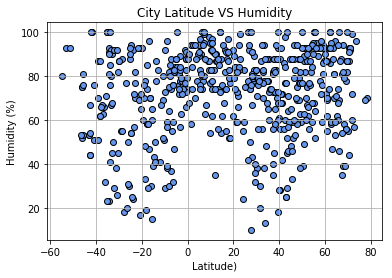

In [11]:
latitude_humidity = plt.scatter(latitude, humidity, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Humidity")
plt.xlabel("Latitude)")
plt.ylabel("Humidity (%)")

plt.grid(b=True)

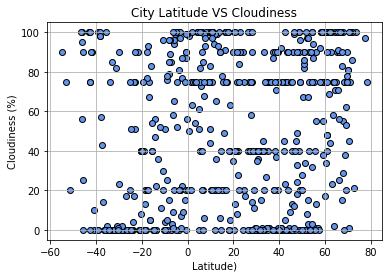

In [12]:
latitude_cloudiness = plt.scatter(latitude, cloudiness, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Cloudiness")
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")

plt.grid(b=True)

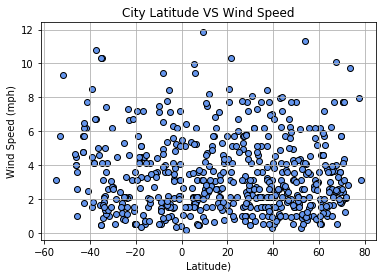

In [13]:
latitude_wind = plt.scatter(latitude, windiness, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Wind Speed")
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")

plt.grid(b=True)

In [14]:
plt.savefig("City Latitude VS Cloudiness.png")
plt.savefig("City Latitude VS Wind Speed.png")
plt.savefig("City Latitude VS Humidity.png")

<Figure size 432x288 with 0 Axes>